In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
target = data_train['Price']
pd.options.display.max_columns = len(data_train.columns)+10

In [3]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
data_train.shape

(10000, 20)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
data_train.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


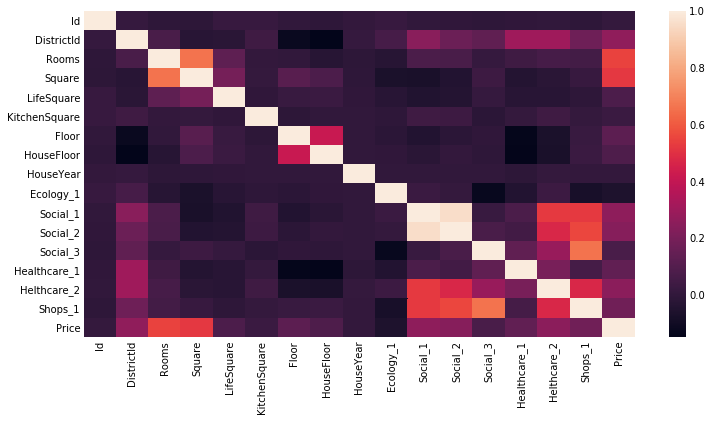

In [8]:
plt.figure(figsize=(11,6))
sns.heatmap(data_train.corr())
# ищем признаки у которых высокая корреляция

In [9]:
data_train = data_train.drop(['Social_2','LifeSquare'], axis = 1)
data_test = data_test.drop(['Social_2','LifeSquare'], axis = 1)
# избавляемся от признаков у которых большая корреляция между собой

In [10]:
data_train[data_train['Rooms']> 6].head()
#Находим записи, у которых комнат больше 6 т.к. скорее всего это выброс или ошибка в данных 

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,10.0,22,22.0,2002,0.090799,B,B,74,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,7.0,17,17.0,2014,0.007122,B,B,1,0,NaN,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,10.0,3,2.0,1994,0.161532,B,B,25,1,30.0,2,4,B,172329.270863


In [11]:
for i in range(1,7):
    print('{} комнатная квартира'.format(i))
    print(data_train[data_train['Rooms'] == i]['Square'].median())
# смотрим среднее значение площади квартиры по комнатам   

1 комнатная квартира
40.40658991236909
2 комнатная квартира
55.84181213903055
3 комнатная квартира
77.41364294803941
4 комнатная квартира
98.66805357992513
5 комнатная квартира
116.08486083443316
6 комнатная квартира
59.41433379627719


In [12]:
data_train.loc[data_train['Rooms'] > 5]
# выводим список квартир комнат у которых больше 5

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,10.0,22,22.0,2002,0.090799,B,B,74,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,7.0,17,17.0,2014,0.007122,B,B,1,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,6.0,7,9.0,1969,0.033494,B,B,66,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,10.0,3,2.0,1994,0.161532,B,B,25,1,30.0,2,4,B,172329.270863


In [13]:
data_train.loc[data_train['Rooms']==19,'Rooms']=1
data_train.loc[data_train['Rooms']==6,'Rooms']=2
data_train.loc[data_train['Rooms']==10,'Rooms']=2
# изменяем значения комнат , сравнивая площадь данной квартиры со средним значеним

In [14]:
data_test.loc[data_test['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,0.0,2,2.0,2015,0.014073,B,B,2,0,NaN,0,0,B
3217,4058,27,6.0,223.453689,16.0,2,2.0,2017,0.041116,B,B,53,4,NaN,1,4,B
3398,1435,111,17.0,52.866107,8.0,15,17.0,1987,0.093443,B,B,23,5,3300.0,2,4,B


In [15]:
data_test.loc[data_test['Rooms']==17,'Rooms']=2



In [16]:
#data_train.loc[data_train['Id']==28,'Square']=60.4705972	
#data_train.loc[data_train['Id']==2307	,'Square']=40.9425181	
#data_train.loc[data_train['Id']==11602,'Square']=64.1065193	

In [17]:
data_train.loc[(data_train['Square']> 150)&(data_train['Rooms']==5), 'Rooms'] = 6
# изменяем колличество комнат, так площадь >150 скорее всего соотвествует 6 

In [18]:
data_train.loc[data_train['HouseYear']==20052011,'HouseYear']=2008
data_train.loc[data_train['HouseYear']==4968,'HouseYear']=1968

In [19]:
data_train.loc[data_train['Id']==28,'Square']=60.4705972
data_train.loc[data_train['Id']==2307,'Square']=40.9425181
data_train.loc[data_train['Id']==11602,'Square']=64.1065193
# изменяем значения комнат так как, было похоже что ошибка в записи и не в том месте поставили запятую
#(вывод параметров этих записий находится в другой тетрадке ) 
#

In [20]:
data_train['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

In [21]:
data_train.loc[data_train['HouseFloor']>60]
# ищем записи у который этажность выше 60 

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,1.0,6,99.0,1977,0.150818,B,B,16,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,9.0,5,99.0,1977,0.075779,B,B,6,3,NaN,0,2,B,243329.912579
8854,78,30,2.0,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,141,1046.0,3,23,B,207248.370520


In [22]:
data_train = data_train.drop(6131)
data_train = data_train.drop(8599)
data_train = data_train.drop(8854)
# удаляем эти записи так как вряд ли сущесвтует дома с этажность выше 60

In [23]:
data_train[data_train['HouseYear'] == 2020].head()
# поиск домов год постройки которого позже 2020

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
585,15051,53,2.0,59.597891,10.0,3,24.0,2020,0.049637,B,B,34,0,229.0,1,3,B,243114.222804
707,4345,62,1.0,49.275155,1.0,5,1.0,2020,0.072158,B,B,2,1,NaN,0,0,A,135353.885620
790,6845,169,3.0,87.371123,12.0,4,24.0,2020,0.178917,B,B,18,4,192.0,1,5,B,295304.011974
918,2530,53,2.0,64.233072,13.0,13,24.0,2020,0.049637,B,B,34,0,229.0,1,3,B,283334.496716
1499,6731,120,2.0,85.087643,10.0,7,10.0,2020,0.341072,B,B,27,48,2300.0,3,11,B,536020.260344


In [24]:
data_test[data_test['HouseYear'] == 2020].head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
385,13407,59,2.0,77.057476,16.0,12,11.0,2020,0.019509,B,B,37,11,176.0,5,5,B
888,8560,37,2.0,57.979074,10.0,7,20.0,2020,0.178917,B,B,18,4,192.0,1,5,B
1039,4696,59,2.0,75.577646,15.0,8,20.0,2020,0.019509,B,B,37,11,176.0,5,5,B
1275,1276,23,2.0,54.491417,1.0,5,3.0,2020,0.005767,B,B,1,0,NaN,0,0,B
3255,9398,58,2.0,70.999008,17.0,13,15.0,2020,0.437885,B,B,23,3,1084.0,0,5,B


In [25]:
#data_train.drop(data_train[data_train['HouseYear']>2020].index, inplace=True)

In [26]:
data_train.loc[data_train['Rooms']==0, 'Rooms'] = 1
data_test.loc[data_test['Rooms']==0, 'Rooms'] = 1

In [27]:
#data_train['LifeSquare'].fillna(0, inplace=True)
data_train['Healthcare_1'].fillna(0, inplace=True)
df_train = data_train.copy()

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 18 columns):
Id               9997 non-null int64
DistrictId       9997 non-null int64
Rooms            9997 non-null float64
Square           9997 non-null float64
KitchenSquare    9997 non-null float64
Floor            9997 non-null int64
HouseFloor       9997 non-null float64
HouseYear        9997 non-null int64
Ecology_1        9997 non-null float64
Ecology_2        9997 non-null object
Ecology_3        9997 non-null object
Social_1         9997 non-null int64
Social_3         9997 non-null int64
Healthcare_1     9997 non-null float64
Helthcare_2      9997 non-null int64
Shops_1          9997 non-null int64
Shops_2          9997 non-null object
Price            9997 non-null float64
dtypes: float64(7), int64(8), object(3)
memory usage: 1.4+ MB


In [29]:
df_train = pd.get_dummies(df_train)
df_train.corr()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,1.000000,0.012938,-0.008008,-0.005696,0.019859,0.001368,-0.006814,0.003428,0.017924,-0.000753,-0.008406,-0.002576,0.001622,-0.008057,0.009820,-0.003110,0.003110,0.005392,-0.005392,-0.003676,0.003676
DistrictId,0.012938,1.000000,0.075925,-0.027480,0.040328,-0.120406,-0.152042,-0.201118,0.065304,0.246499,0.136574,0.302290,0.306540,0.174588,0.265205,0.093404,-0.093404,0.027888,-0.027888,0.020991,-0.020991
Rooms,-0.008008,0.075925,1.000000,0.759866,0.004925,-0.006241,-0.032207,-0.043819,-0.030872,0.077168,0.014195,0.052524,0.064179,0.054018,0.571910,0.002356,-0.002356,0.007401,-0.007401,0.001123,-0.001123
Square,-0.005696,-0.027480,0.759866,1.000000,0.009027,0.116760,0.087954,0.190093,-0.070775,-0.077393,0.022716,-0.046909,-0.032053,0.011003,0.577938,-0.032130,0.032130,-0.023690,0.023690,0.056670,-0.056670
KitchenSquare,0.019859,0.040328,0.004925,0.009027,1.000000,-0.011402,0.001213,0.038529,-0.005632,0.043381,-0.015062,0.013866,0.043244,0.010303,0.028877,-0.000271,0.000271,0.007914,-0.007914,0.017307,-0.017307
Floor,0.001368,-0.120406,-0.006241,0.116760,-0.011402,1.000000,0.432986,0.284451,-0.016156,-0.045015,-0.002206,-0.115119,-0.065518,0.024300,0.128788,-0.049676,0.049676,-0.025789,0.025789,0.013589,-0.013589
HouseFloor,-0.006814,-0.152042,-0.032207,0.087954,0.001213,0.432986,1.000000,0.406346,-0.002784,-0.019121,-0.016753,-0.104657,-0.073748,0.021272,0.089423,-0.060674,0.060674,-0.008822,0.008822,-0.051238,0.051238
HouseYear,0.003428,-0.201118,-0.043819,0.190093,0.038529,0.284451,0.406346,1.000000,-0.066542,-0.047985,-0.049242,-0.208515,-0.116296,-0.001986,0.036678,-0.076825,0.076825,-0.047191,0.047191,0.058787,-0.058787
Ecology_1,0.017924,0.065304,-0.030872,-0.070775,-0.005632,-0.016156,-0.002784,-0.066542,1.000000,0.026427,-0.123715,0.115538,0.030915,-0.076444,-0.058407,0.110721,-0.110721,0.223193,-0.223193,-0.079847,0.079847
Social_1,-0.000753,0.246499,0.077168,-0.077393,0.043381,-0.045015,-0.019121,-0.047985,0.026427,1.000000,0.023815,0.163770,0.524780,0.526735,0.263392,0.066005,-0.066005,0.037751,-0.037751,-0.144707,0.144707


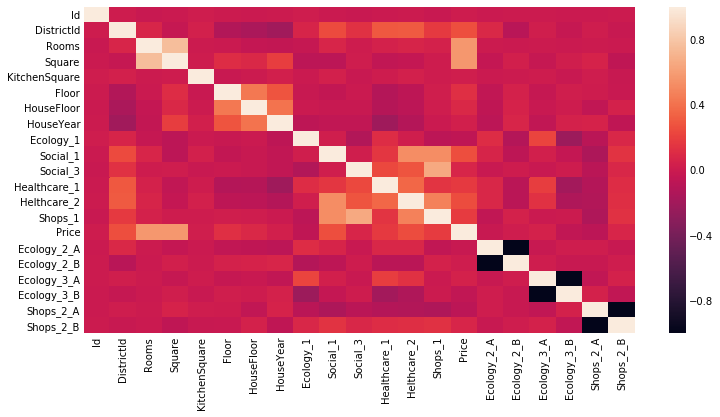

In [30]:
plt.figure(figsize=(11,6))
sns.heatmap(df_train.corr())
# смотрим на корреляцию между признаками

In [31]:
price_mean_by_distr_rooms=data_train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_dr_room'})
price_mean_by_distr = data_train.groupby(['DistrictId'],as_index=False).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_dr'})
square_mean_by_distr_rooms=data_train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Square':'mean'}).\
                    rename(columns={'Square':'mean_square_dr_room'})
square_mean_by_dist = data_train.groupby(['DistrictId'],as_index=False).agg({'Square':'mean'}).\
                    rename(columns={'Square':'mean_square_dr'})
def add_mean_price_for_m_2(df,price_mean_by_distr_rooms,square_mean_by_distr_rooms,price_mean_by_distr,square_mean_by_dist):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,square_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left') 
    df=pd.merge(df,price_mean_by_distr,on=['DistrictId'],how='left')
    df=pd.merge(df,square_mean_by_dist,on=['DistrictId'],how='left')
    df['price_dr_r_m^2'] = df['mean_price_dr']/df['mean_square_dr']
    return df
df_train=pd.merge(df_train,price_mean_by_distr,on=['DistrictId'],how='left')
#обогащаем данные( средней стоимость квадратного метра в районе)

In [32]:
df_train.corr()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr
Id,1.000000,0.012938,-0.008008,-0.005696,0.019859,0.001368,-0.006814,0.003428,0.017924,-0.000753,-0.008406,-0.002576,0.001622,-0.008057,0.009820,-0.003110,0.003110,0.005392,-0.005392,-0.003676,0.003676,0.008102
DistrictId,0.012938,1.000000,0.075925,-0.027480,0.040328,-0.120406,-0.152042,-0.201118,0.065304,0.246499,0.136574,0.302290,0.306540,0.174588,0.265205,0.093404,-0.093404,0.027888,-0.027888,0.020991,-0.020991,0.452718
Rooms,-0.008008,0.075925,1.000000,0.759866,0.004925,-0.006241,-0.032207,-0.043819,-0.030872,0.077168,0.014195,0.052524,0.064179,0.054018,0.571910,0.002356,-0.002356,0.007401,-0.007401,0.001123,-0.001123,0.159274
Square,-0.005696,-0.027480,0.759866,1.000000,0.009027,0.116760,0.087954,0.190093,-0.070775,-0.077393,0.022716,-0.046909,-0.032053,0.011003,0.577938,-0.032130,0.032130,-0.023690,0.023690,0.056670,-0.056670,0.056386
KitchenSquare,0.019859,0.040328,0.004925,0.009027,1.000000,-0.011402,0.001213,0.038529,-0.005632,0.043381,-0.015062,0.013866,0.043244,0.010303,0.028877,-0.000271,0.000271,0.007914,-0.007914,0.017307,-0.017307,0.040610
Floor,0.001368,-0.120406,-0.006241,0.116760,-0.011402,1.000000,0.432986,0.284451,-0.016156,-0.045015,-0.002206,-0.115119,-0.065518,0.024300,0.128788,-0.049676,0.049676,-0.025789,0.025789,0.013589,-0.013589,-0.011365
HouseFloor,-0.006814,-0.152042,-0.032207,0.087954,0.001213,0.432986,1.000000,0.406346,-0.002784,-0.019121,-0.016753,-0.104657,-0.073748,0.021272,0.089423,-0.060674,0.060674,-0.008822,0.008822,-0.051238,0.051238,-0.040012
HouseYear,0.003428,-0.201118,-0.043819,0.190093,0.038529,0.284451,0.406346,1.000000,-0.066542,-0.047985,-0.049242,-0.208515,-0.116296,-0.001986,0.036678,-0.076825,0.076825,-0.047191,0.047191,0.058787,-0.058787,-0.141293
Ecology_1,0.017924,0.065304,-0.030872,-0.070775,-0.005632,-0.016156,-0.002784,-0.066542,1.000000,0.026427,-0.123715,0.115538,0.030915,-0.076444,-0.058407,0.110721,-0.110721,0.223193,-0.223193,-0.079847,0.079847,-0.056091
Social_1,-0.000753,0.246499,0.077168,-0.077393,0.043381,-0.045015,-0.019121,-0.047985,0.026427,1.000000,0.023815,0.163770,0.524780,0.526735,0.263392,0.066005,-0.066005,0.037751,-0.037751,-0.144707,0.144707,0.424968


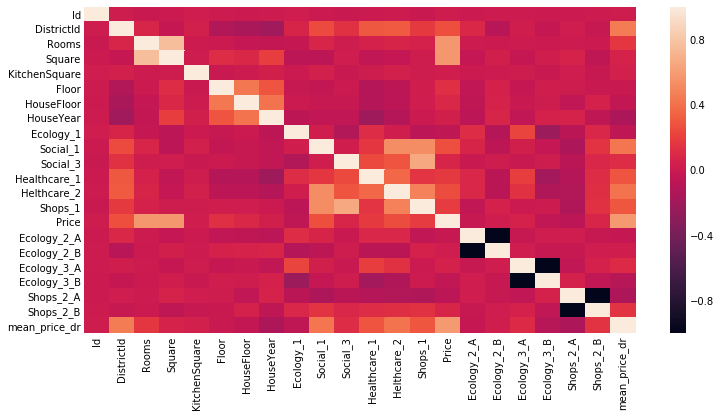

In [33]:
plt.figure(figsize=(11,6))
sns.heatmap(df_train.corr())

In [34]:
X_corr = data_train.corr()
hight_corr1 = X_corr[(abs(X_corr['Price']) >0.35) ]
hight_corr1
# ищем признаки корреляция с которыми выше 0.35

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Rooms,-0.008008,0.075925,1.000000,0.759866,0.004925,-0.006241,-0.032207,-0.043819,-0.030872,0.077168,0.014195,0.052524,0.064179,0.054018,0.571910
Square,-0.005696,-0.027480,0.759866,1.000000,0.009027,0.116760,0.087954,0.190093,-0.070775,-0.077393,0.022716,-0.046909,-0.032053,0.011003,0.577938
Price,0.009820,0.265205,0.571910,0.577938,0.028877,0.128788,0.089423,0.036678,-0.058407,0.263392,0.075061,0.173829,0.253046,0.181054,1.000000


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = df_train.drop(['Price','DistrictId'], axis =1)
Y = df_train["Price"]
lr = LinearRegression()
#select 5 the most informative features
rfe = RFE(lr, 11) 
selector = rfe.fit(X,Y)

# строим RFE для отбора признаков

In [36]:
print(X.columns)

Index(['Id', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'mean_price_dr'],
      dtype='object')


In [37]:
print("Num Features: ")
print(selector.n_features_)

print("Selected Features: ")
print(selector.support_)

print("Feature Ranking: ")
print(selector.ranking_)
#выводим признаки

Num Features: 
11
Selected Features: 
[False  True  True False  True False False  True False False False  True
 False  True  True  True  True  True  True False]
Feature Ranking: 
[10  1  1  7  1  4  6  1  2  5  8  1  3  1  1  1  1  1  1  9]


In [38]:
print(X.columns)

Index(['Id', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'mean_price_dr'],
      dtype='object')


In [39]:
feat1 = ['Rooms','Square','Floor','Ecology_1','Shops_2_B','Ecology_3_B', 'Shops_2_A',
         'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A','Helthcare_2']

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

model.fit(X, Y)

print(model.feature_importances_)
# строим ExtraTreesRegressor для поиска признаков

[0.02329372 0.2302015  0.19395658 0.03400461 0.02990133 0.03449941
 0.03781793 0.01781087 0.07056363 0.02724124 0.01831725 0.02438478
 0.01837462 0.00030327 0.00031525 0.00162698 0.00193857 0.00208612
 0.00194463 0.23141773]


In [41]:
print(X.columns)

Index(['Id', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'mean_price_dr'],
      dtype='object')


In [42]:
di = {}
for i,j in enumerate(X.columns):
    di[X.columns[i]] = model.feature_importances_[i]
sorted_x = sorted(di.items(), key=lambda kv: kv[1])
sorted_x

[('Ecology_2_A', 0.00030326828296474255),
 ('Ecology_2_B', 0.00031524877578111135),
 ('Ecology_3_A', 0.001626984577269734),
 ('Ecology_3_B', 0.0019385689549486558),
 ('Shops_2_B', 0.0019446328736672925),
 ('Shops_2_A', 0.0020861232943351453),
 ('Ecology_1', 0.017810865175893552),
 ('Healthcare_1', 0.0183172469665963),
 ('Shops_1', 0.018374617628509927),
 ('Id', 0.02329371705917738),
 ('Helthcare_2', 0.02438477622368098),
 ('Social_3', 0.027241235449285594),
 ('Floor', 0.029901326219804604),
 ('KitchenSquare', 0.03400461118434757),
 ('HouseFloor', 0.03449940682955991),
 ('HouseYear', 0.037817930126398135),
 ('Social_1', 0.07056363462480457),
 ('Square', 0.19395657736934047),
 ('Rooms', 0.23020150147261292),
 ('mean_price_dr', 0.23141772691102144)]

In [43]:
feat2 = ['mean_price_dr','Square','Rooms','HouseYear','HouseFloor','Floor','Healthcare_1','Social_1']
# отбираем признаки 

In [44]:
len(feat2)

8

In [45]:
"""def prepare_lifesquare(df):
    df.loc[df['Square']<df['LifeSquare'],'LifeSquare']=df['Square']
    return df
prepare_lifesquare(data_train)
prepare_lifesquare(data_test)"""

"def prepare_lifesquare(df):\n    df.loc[df['Square']<df['LifeSquare'],'LifeSquare']=df['Square']\n    return df\nprepare_lifesquare(data_train)\nprepare_lifesquare(data_test)"

In [46]:
"""def fillna_life_square(df,source_df):
    df['LifeSquare']=df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    return df
def fillna_life_square(df,source_df):
    df1 = pd.DataFrame(columns=df.columns)
    for i in range(0,7):
        a = source_df[source_df['Rooms']==i]['LifeSquare'].mean()
        df2 =df[df['Rooms'] == i]
        df2['LifeSquare'] = df2['LifeSquare'].fillna(a)
        df1 = pd.concat([df1,df2])
    return df1
data_train = fillna_life_square(data_train,data_train)
data_test = fillna_life_square(data_test,data_train)"""

"def fillna_life_square(df,source_df):\n    df['LifeSquare']=df['LifeSquare'].fillna(source_df['LifeSquare'].mean())\n    return df\ndef fillna_life_square(df,source_df):\n    df1 = pd.DataFrame(columns=df.columns)\n    for i in range(0,7):\n        a = source_df[source_df['Rooms']==i]['LifeSquare'].mean()\n        df2 =df[df['Rooms'] == i]\n        df2['LifeSquare'] = df2['LifeSquare'].fillna(a)\n        df1 = pd.concat([df1,df2])\n    return df1\ndata_train = fillna_life_square(data_train,data_train)\ndata_test = fillna_life_square(data_test,data_train)"

In [47]:
#data_train.loc[data_train['Id']==16550,'LifeSquare']=data_train[data_train['Rooms'] == 3]['LifeSquare'].median()

In [48]:
#df_train = data_train.drop(['Price'],axis = 1)

In [49]:
#df_train = pd.get_dummies(df_train)
#df_test = pd.get_dummies(df_test)
#df_train = df_train.drop(['Healthcare_1',], axis = 1)
#df_test = df_test.drop(['Healthcare_1'], axis =1)
#df_train = data_train.copy()
#df_train = df_train.drop(['Price'], axis=1)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 22 columns):
Id               9997 non-null int64
DistrictId       9997 non-null int64
Rooms            9997 non-null float64
Square           9997 non-null float64
KitchenSquare    9997 non-null float64
Floor            9997 non-null int64
HouseFloor       9997 non-null float64
HouseYear        9997 non-null int64
Ecology_1        9997 non-null float64
Social_1         9997 non-null int64
Social_3         9997 non-null int64
Healthcare_1     9997 non-null float64
Helthcare_2      9997 non-null int64
Shops_1          9997 non-null int64
Price            9997 non-null float64
Ecology_2_A      9997 non-null uint8
Ecology_2_B      9997 non-null uint8
Ecology_3_A      9997 non-null uint8
Ecology_3_B      9997 non-null uint8
Shops_2_A        9997 non-null uint8
Shops_2_B        9997 non-null uint8
mean_price_dr    9997 non-null float64
dtypes: float64(8), int64(8), uint8(6)
memory usage: 1.4 MB


In [51]:
#df_train = pd.get_dummies(df_train)

In [52]:
#df_train['Healthcare_1'] = df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].mean())

In [53]:
df_train.corr()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr
Id,1.000000,0.012938,-0.008008,-0.005696,0.019859,0.001368,-0.006814,0.003428,0.017924,-0.000753,-0.008406,-0.002576,0.001622,-0.008057,0.009820,-0.003110,0.003110,0.005392,-0.005392,-0.003676,0.003676,0.008102
DistrictId,0.012938,1.000000,0.075925,-0.027480,0.040328,-0.120406,-0.152042,-0.201118,0.065304,0.246499,0.136574,0.302290,0.306540,0.174588,0.265205,0.093404,-0.093404,0.027888,-0.027888,0.020991,-0.020991,0.452718
Rooms,-0.008008,0.075925,1.000000,0.759866,0.004925,-0.006241,-0.032207,-0.043819,-0.030872,0.077168,0.014195,0.052524,0.064179,0.054018,0.571910,0.002356,-0.002356,0.007401,-0.007401,0.001123,-0.001123,0.159274
Square,-0.005696,-0.027480,0.759866,1.000000,0.009027,0.116760,0.087954,0.190093,-0.070775,-0.077393,0.022716,-0.046909,-0.032053,0.011003,0.577938,-0.032130,0.032130,-0.023690,0.023690,0.056670,-0.056670,0.056386
KitchenSquare,0.019859,0.040328,0.004925,0.009027,1.000000,-0.011402,0.001213,0.038529,-0.005632,0.043381,-0.015062,0.013866,0.043244,0.010303,0.028877,-0.000271,0.000271,0.007914,-0.007914,0.017307,-0.017307,0.040610
Floor,0.001368,-0.120406,-0.006241,0.116760,-0.011402,1.000000,0.432986,0.284451,-0.016156,-0.045015,-0.002206,-0.115119,-0.065518,0.024300,0.128788,-0.049676,0.049676,-0.025789,0.025789,0.013589,-0.013589,-0.011365
HouseFloor,-0.006814,-0.152042,-0.032207,0.087954,0.001213,0.432986,1.000000,0.406346,-0.002784,-0.019121,-0.016753,-0.104657,-0.073748,0.021272,0.089423,-0.060674,0.060674,-0.008822,0.008822,-0.051238,0.051238,-0.040012
HouseYear,0.003428,-0.201118,-0.043819,0.190093,0.038529,0.284451,0.406346,1.000000,-0.066542,-0.047985,-0.049242,-0.208515,-0.116296,-0.001986,0.036678,-0.076825,0.076825,-0.047191,0.047191,0.058787,-0.058787,-0.141293
Ecology_1,0.017924,0.065304,-0.030872,-0.070775,-0.005632,-0.016156,-0.002784,-0.066542,1.000000,0.026427,-0.123715,0.115538,0.030915,-0.076444,-0.058407,0.110721,-0.110721,0.223193,-0.223193,-0.079847,0.079847,-0.056091
Social_1,-0.000753,0.246499,0.077168,-0.077393,0.043381,-0.045015,-0.019121,-0.047985,0.026427,1.000000,0.023815,0.163770,0.524780,0.526735,0.263392,0.066005,-0.066005,0.037751,-0.037751,-0.144707,0.144707,0.424968


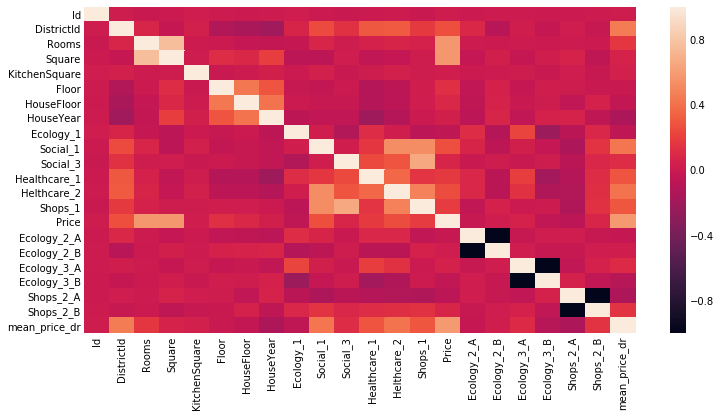

In [54]:
plt.figure(figsize=(11,6))
sns.heatmap(df_train.corr())

In [55]:
X = df_train.drop(['Price'],axis =1)
Y = df_train['Price']

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2,mean_squared_error as mse

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 21 columns):
Id               9997 non-null int64
DistrictId       9997 non-null int64
Rooms            9997 non-null float64
Square           9997 non-null float64
KitchenSquare    9997 non-null float64
Floor            9997 non-null int64
HouseFloor       9997 non-null float64
HouseYear        9997 non-null int64
Ecology_1        9997 non-null float64
Social_1         9997 non-null int64
Social_3         9997 non-null int64
Healthcare_1     9997 non-null float64
Helthcare_2      9997 non-null int64
Shops_1          9997 non-null int64
Ecology_2_A      9997 non-null uint8
Ecology_2_B      9997 non-null uint8
Ecology_3_A      9997 non-null uint8
Ecology_3_B      9997 non-null uint8
Shops_2_A        9997 non-null uint8
Shops_2_B        9997 non-null uint8
mean_price_dr    9997 non-null float64
dtypes: float64(7), int64(8), uint8(6)
memory usage: 1.3 MB


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X[feat2],Y, test_size =0.3)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_1 = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_1 = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# маштабируем признаки

In [60]:
c_values = np.logspace(-2, 5, 36)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    rgr5 = SVR(C=value, gamma="auto")
    
    rgr5.fit(X_train_1, y_train)
    
    y_pred5 = rgr5.predict(X_test_1)
    y_pred_train5 = rgr5.predict(X_train_1)
        
    acc_valid = r2(y_test, y_pred5)
    acc_train = r2(y_train, y_pred_train5)
    
    if i % 5 == 0:
        print('C = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)
# строим SVM

C = 0.01
	acc_valid = -0.05614793022747011
	acc_train = -0.056338956789300454

C = 0.1
	acc_valid = -0.056068251115333645
	acc_train = -0.056257744710015656

C = 1.0
	acc_valid = -0.05540642389158279
	acc_train = -0.055584379079892

C = 10.0
	acc_valid = -0.047873856783685165
	acc_train = -0.04791112086482041

C = 100.0
	acc_valid = 0.015568994849680662
	acc_train = 0.01656528224740017

C = 1000.0
	acc_valid = 0.36760525113087916
	acc_train = 0.37156386650035966

C = 10000.0
	acc_valid = 0.6354532372289051
	acc_train = 0.6367179020062692

C = 100000.0
	acc_valid = 0.6854627592222893
	acc_train = 0.6870074932533012



In [61]:
c_values = np.logspace(-2, 5, 36)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    rgr5 = SVR(C=value, gamma="auto")
    
    rgr5.fit(X_train_1, y_train)
    
    y_pred5 = rgr5.predict(X_test_1)
    y_pred_train5 = rgr5.predict(X_train_1)
        
    acc_valid = r2(y_test, y_pred5)
    acc_train = r2(y_train, y_pred_train5)
    
    if i % 5 == 0:
        print('C = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

C = 0.01
	acc_valid = -0.05614793022747011
	acc_train = -0.056338956789300454

C = 0.1
	acc_valid = -0.056068251115333645
	acc_train = -0.056257744710015656

C = 1.0
	acc_valid = -0.05540642389158279
	acc_train = -0.055584379079892

C = 10.0
	acc_valid = -0.047873856783685165
	acc_train = -0.04791112086482041

C = 100.0
	acc_valid = 0.015568994849680662
	acc_train = 0.01656528224740017

C = 1000.0
	acc_valid = 0.36760525113087916
	acc_train = 0.37156386650035966

C = 10000.0
	acc_valid = 0.6354532372289051
	acc_train = 0.6367179020062692

C = 100000.0
	acc_valid = 0.6854627592222893
	acc_train = 0.6870074932533012



In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
"""parameters = [{
    'n_estimators': np.arange(100, 1000,100),
    'max_features': [1,3,5],
    'max_depth': [7, 11, 15],
    'min_samples_leaf': [1, 3, 5, 7],
    'min_samples_split': [3]
}]

rgr = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, criterion='mae'),
    param_grid=parameters,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

rgr.fit(X_train, y_train)

y_pred = rgr.predict(X_test)
r2(y_test, y_pred)"""
# Проводили Grid Search. для оптимального подбора параметров

"parameters = [{\n    'n_estimators': np.arange(100, 1000,100),\n    'max_features': [1,3,5],\n    'max_depth': [7, 11, 15],\n    'min_samples_leaf': [1, 3, 5, 7],\n    'min_samples_split': [3]\n}]\n\nrgr = GridSearchCV(\n    estimator=RandomForestRegressor(random_state=42, criterion='mae'),\n    param_grid=parameters,\n    scoring='r2',\n    cv=3,\n    n_jobs=-1\n)\n\nrgr.fit(X_train, y_train)\n\ny_pred = rgr.predict(X_test)\nr2(y_test, y_pred)"

In [79]:
#r2(y_train, rgr.predict(X_train))

In [80]:
#rgr.best_params_

In [66]:
rgr1 = RandomForestRegressor(max_depth=15, max_features=3,min_samples_leaf=1,min_samples_split = 3, n_estimators=800)

rgr1.fit(X_train, y_train)

y_pred1 = rgr1.predict(X_test)

r2(y_test, y_pred1), r2(y_train,rgr1.predict(X_train))
# построили модель с самыми оптимальными параметрами

(0.7423751611658773, 0.939566292914535)

In [67]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(6), int64(8), object(3)
memory usage: 664.1+ KB


In [68]:
df_test = pd.get_dummies(data_test)

In [69]:
df_test=pd.merge(df_test,price_mean_by_distr,on=['DistrictId'],how='left')

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
mean_price_dr    4992 non-null float64
dtypes: float64(7), int64(8), uint8(6)
memory usage: 654.3 KB


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 22 columns):
Id               9997 non-null int64
DistrictId       9997 non-null int64
Rooms            9997 non-null float64
Square           9997 non-null float64
KitchenSquare    9997 non-null float64
Floor            9997 non-null int64
HouseFloor       9997 non-null float64
HouseYear        9997 non-null int64
Ecology_1        9997 non-null float64
Social_1         9997 non-null int64
Social_3         9997 non-null int64
Healthcare_1     9997 non-null float64
Helthcare_2      9997 non-null int64
Shops_1          9997 non-null int64
Price            9997 non-null float64
Ecology_2_A      9997 non-null uint8
Ecology_2_B      9997 non-null uint8
Ecology_3_A      9997 non-null uint8
Ecology_3_B      9997 non-null uint8
Shops_2_A        9997 non-null uint8
Shops_2_B        9997 non-null uint8
mean_price_dr    9997 non-null float64
dtypes: float64(8), int64(8), uint8(6)
memory usage: 1.4 MB


In [72]:
df_test['Healthcare_1'].fillna(0, inplace=True)

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
mean_price_dr    4992 non-null float64
dtypes: float64(7), int64(8), uint8(6)
memory usage: 654.3 KB


In [74]:
a = df_test['mean_price_dr'].mean()
df_test['mean_price_dr'].fillna(a, inplace=True)

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
mean_price_dr    5000 non-null float64
dtypes: float64(7), int64(8), uint8(6)
memory usage: 654.3 KB


In [76]:
X_train.head()

,mean_price_dr,Square,Rooms,HouseYear,HouseFloor,Floor,Healthcare_1,Social_1
9859,251178.047688,42.053535,1.0,2002,22.0,11,0.0,74
2183,156046.416277,86.036862,2.0,1977,22.0,3,0.0,2
8415,156046.416277,51.684045,1.0,1977,13.0,14,0.0,2
5501,199565.803546,37.613358,1.0,1990,17.0,2,2715.0,22
8716,303254.118677,63.255709,2.0,2014,24.0,12,0.0,23


In [77]:
y_pred_test=rgr1.predict(df_test[feat2])

In [78]:
result=pd.concat([df_test['Id'],pd.Series(y_pred_test)],axis=1).rename(columns={0:'Price'})
result.to_csv('NButorin_predictions.csv',index=None)
# выводим результаты